# COLLEGE EVENT FEEDBACK ANALYSIS

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS

In [220]:
feedback= pd.read_csv(r"C:\Users\Vikas\Desktop\FUTURE_DS_03\Dataset\student_feedback.csv")
Statisfaction = pd.read_csv(r"C:\Users\Vikas\Desktop\FUTURE_DS_03\Dataset\Student_Satisfaction_Survey.csv",encoding="ISO-8859-1")


## Cleaning the Student feedback data

In [221]:
feedback.rename(columns={
    "Unnamed: 0": "ID",
    "Student ID": "Student_ID",
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Concept_Clarity",
    "Use of presentations": "Presentations",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Solving",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Extra_Support",
    "Course recommendation based on relevance": "Course_Recommendation"
}, inplace=True)


In [222]:
feedback.head(3)


,ID,Student_ID,Subject_Knowledge,Concept_Clarity,Presentations,Assignment_Difficulty,Doubt_Solving,Course_Structure,Extra_Support,Course_Recommendation
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1


In [223]:
feedback.shape

(1001, 10)

In [224]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID                     1001 non-null   int64
 1   Student_ID             1001 non-null   int64
 2   Subject_Knowledge      1001 non-null   int64
 3   Concept_Clarity        1001 non-null   int64
 4   Presentations          1001 non-null   int64
 5   Assignment_Difficulty  1001 non-null   int64
 6   Doubt_Solving          1001 non-null   int64
 7   Course_Structure       1001 non-null   int64
 8   Extra_Support          1001 non-null   int64
 9   Course_Recommendation  1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


In [225]:
feedback.isnull().sum()

ID                       0
Student_ID               0
Subject_Knowledge        0
Concept_Clarity          0
Presentations            0
Assignment_Difficulty    0
Doubt_Solving            0
Course_Structure         0
Extra_Support            0
Course_Recommendation    0
dtype: int64

In [226]:
# Check for duplicate values
feedback.duplicated().sum()

np.int64(0)

## Cleaning the Student Satisfaction Survery data

In [227]:
Statisfaction.head(3)

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [228]:
Statisfaction.rename(columns={
    'SN': 'SN',
    'Total Feedback Given': 'Feedback',
    'Total Configured': 'Configured',
    'Questions': 'Ques',
    'Weightage 1': 'W1',
    'Weightage 2': 'W2',
    'Weightage 3': 'W3',
    'Weightage 4': 'W4',
    'Weightage 5': 'W5',
    'Average/ Percentage': 'Avg%',
    'Course Name': 'Course',
    'Basic Course': 'Basic'
}, inplace=True)

In [229]:
Statisfaction.shape

(580, 12)

In [230]:
Statisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SN            580 non-null    int64 
 1   Feedback      580 non-null    int64 
 2   Configured    580 non-null    int64 
 3   Ques          580 non-null    object
 4   W1            580 non-null    int64 
 5   W2            580 non-null    int64 
 6   W3            580 non-null    int64 
 7   W4            580 non-null    int64 
 8   W5            580 non-null    int64 
 9   Avg%          580 non-null    object
 10  Course Name   580 non-null    object
 11  Basic         580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [231]:
Statisfaction.isnull().sum()

SN              0
Feedback        0
Configured      0
Ques            0
W1              0
W2              0
W3              0
W4              0
W5              0
Avg%            0
Course Name     0
Basic           0
dtype: int64

In [232]:
# Check for duplicate values
Statisfaction.duplicated().sum()

np.int64(0)

In [233]:
Statisfaction["Course Name "].unique()

array(['FY B.VOC FOOD TECHNOLOGY', 'FYBA',
       'FY BCOM (ACCOUNTING & FINANCE)', 'FY BCOM (BANKING & INSURANCE)',
       'FYBMS ', 'FYBSC', 'MA PSYCHOLOGY - 1', 'MA PSYCHOLOGY - 3',
       'M.SC PART - 1 COMPUTER SCIENCE', 'MSC ANALYTICAL CHEMISTRY SEM I',
       'MSC DATA SCIENCE - 1', 'MSC INFORMATION TECHNOLOGY - 1',
       'MSC MICROBIOLOGY - 1', 'MSC ANALYTICAL CHEMISTRY SEM III',
       'M.SC PART - 2 COMPUTER SCIENCE', 'MSC DATA SCIENCE - 3',
       'MSC INFORMATION TECHNOLOGY - 3', 'MSC MICROBIOLOGY - 3',
       'MSC ORGANIC CHEMISTRY - 3', 'MSC PHYSICS - 3', 'S.Y.B.A.F',
       'SYBCOM', 'SYBMS ', 'SYBSC', 'SY COMPUTER SCIENCE', 'TYBA',
       'TYBCOM', 'TYBMS ', 'TYBSC '], dtype=object)

In [234]:
le = LabelEncoder()
Statisfaction['Course_Code'] = le.fit_transform(Statisfaction['Course Name '])
Statisfaction[['Course Name ', 'Course_Code']].head(3)

,Course Name,Course_Code
0,FY B.VOC FOOD TECHNOLOGY,0
1,FY B.VOC FOOD TECHNOLOGY,0
2,FY B.VOC FOOD TECHNOLOGY,0


In [235]:
Statisfaction["Basic"].unique()

array(['B.VOC FOOD TECHNOLOGY', 'BACHELOR OF ARTS',
       'BACHELOR OF COMMERCE (ACCOUNTING AND FINANCE)',
       'BACHELOR OF COMMERCE (BANKING AND INSURANCE)',
       'BACHELOR OF MANAGEMENT STUDIES', 'BACHELOR OF SCIENCE',
       'MA PSYCHOLOGY', 'MSC COMPUTER SCIENCE',
       'MSC ANALYTICAL CHEMISTRY', 'MSC DATA SCIENCE',
       'MSC INFORMATION TECHNOLOGY', 'MSC MICROBIOLOGY',
       'MSC ORGANIC CHEMISTRY', 'MSC PHYSICS', 'BACHELOR OF COMMERCE',
       'B.SC. COMPUTER SCIENCE'], dtype=object)

In [236]:
Statisfaction['Basic_InCode'] = le.fit_transform(Statisfaction['Basic'])
Statisfaction[['Basic', 'Basic_InCode']].head(3)

,Basic,Basic_InCode
0,B.VOC FOOD TECHNOLOGY,1
1,B.VOC FOOD TECHNOLOGY,1
2,B.VOC FOOD TECHNOLOGY,1


## Charts & Visualizations on Feedback Dataset

## Ratings Distribution Chart

C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\2969416608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\2969416608.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


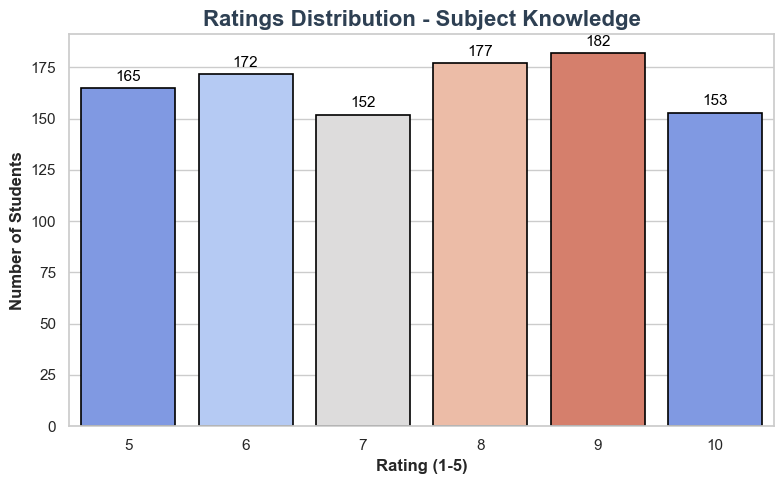

In [237]:

sns.set_theme(style="whitegrid")
question_col = "Subject_Knowledge"
plt.figure(figsize=(8,5))
colors = sns.color_palette("coolwarm", 5)  # For ratings 1–5
sns.countplot(
    x=question_col,
    data=feedback,
    palette=colors,
    edgecolor='black',
    linewidth=1.2
)
plt.title(f"Ratings Distribution - {question_col.replace('_', ' ')}", fontsize=16, fontweight='bold', color="#2E4053")
plt.xlabel("Rating (1-5)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Students", fontsize=12, fontweight='bold')
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 8),
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

## Average Ratings per Question

C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\901857327.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


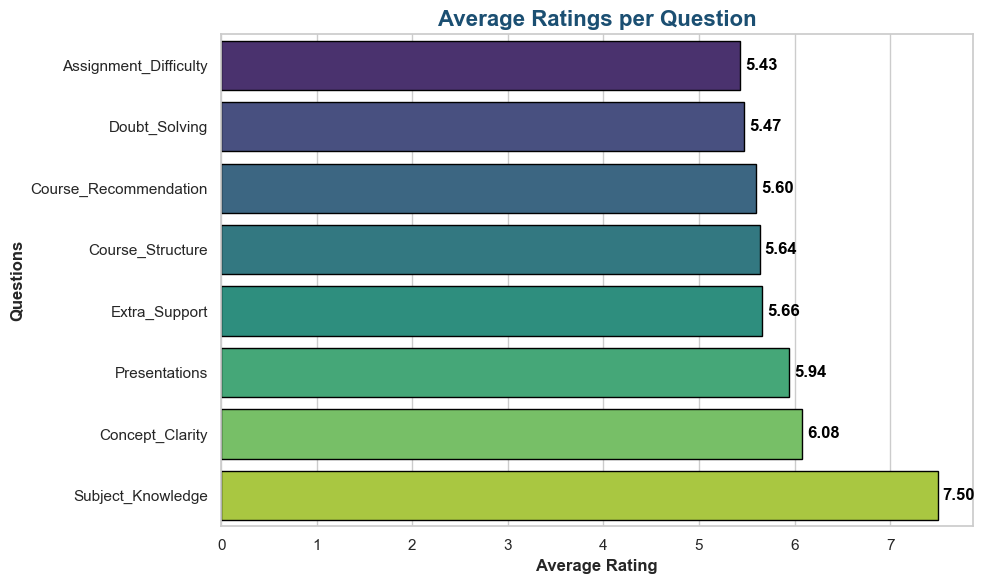

In [238]:
# Select only rating columns
rating_cols = [
    "Subject_Knowledge",
    "Concept_Clarity",
    "Presentations",
    "Assignment_Difficulty",
    "Doubt_Solving",
    "Course_Structure",
    "Extra_Support",
    "Course_Recommendation"
]

# Calculate average rating for each question
avg_ratings = feedback[rating_cols].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_ratings.values,
    y=avg_ratings.index,
    palette="viridis",
    edgecolor="black"
)

plt.title("Average Ratings per Question", fontsize=16, fontweight='bold', color="#1B4F72")
plt.xlabel("Average Rating", fontsize=12, fontweight='bold')
plt.ylabel("Questions", fontsize=12, fontweight='bold')

# Add value labels
for i, v in enumerate(avg_ratings.values):
    plt.text(v + 0.05, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Average Rating

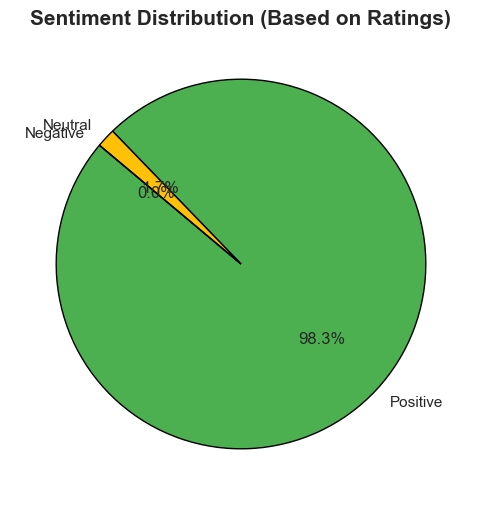

In [239]:

for col in rating_cols:
    feedback[col] = pd.to_numeric(feedback[col], errors='coerce')

feedback["Avg_Rating"] = feedback[rating_cols].mean(axis=1)

feedback["Sentiment"] = pd.cut(
    feedback["Avg_Rating"],
    bins=[-1, 2.5, 3.5, 5.1],  # adjust boundaries if needed
    labels=["Negative", "Neutral", "Positive"]
)

sentiment_counts = feedback["Sentiment"].value_counts().reindex(["Positive", "Neutral", "Negative"]).fillna(0)

sns.set_theme(style="whitegrid")

# Create pie chart
plt.figure(figsize=(6, 6))
colors = ["#4CAF50", "#FFC107", "#F44336"]  # green, yellow, red
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Sentiment Distribution (Based on Ratings)", fontsize=15, fontweight="bold")
plt.show()


## Rating Distribution by Feedback Category

<Figure size 1000x600 with 0 Axes>

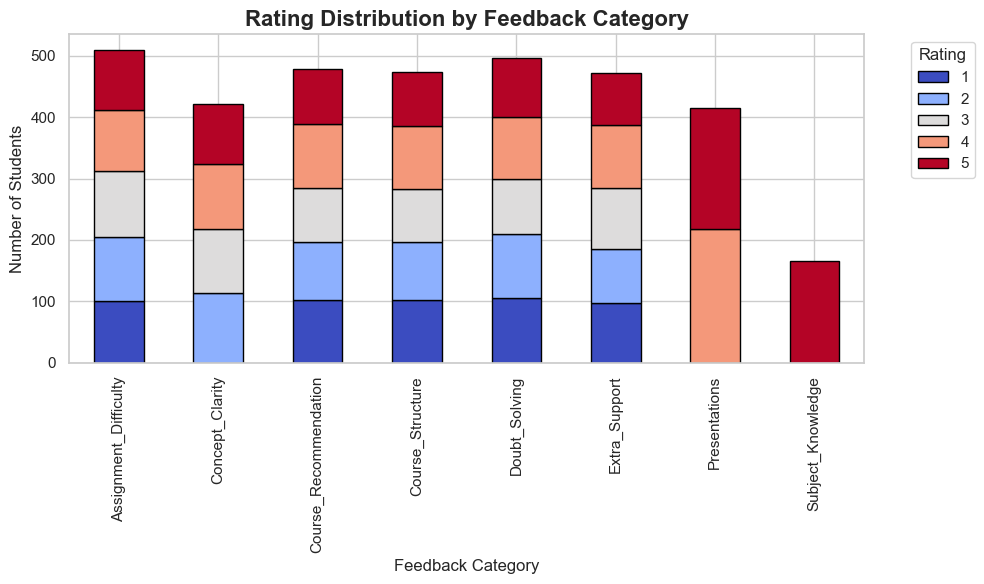

In [240]:

for col in rating_cols:
    feedback[col] = pd.to_numeric(feedback[col], errors='coerce')
feedback_melted = feedback.melt(value_vars=rating_cols, var_name="Category", value_name="Rating")
rating_distribution = feedback_melted.groupby(["Category", "Rating"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

rating_pivot = rating_distribution.pivot(index="Category", columns="Rating", values="Count").fillna(0)
rating_pivot = rating_pivot[[1, 2, 3, 4, 5]]

rating_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="coolwarm",
    edgecolor="black"
)

plt.title("Rating Distribution by Feedback Category", fontsize=16, fontweight="bold")
plt.xlabel("Feedback Category", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Average rating chart

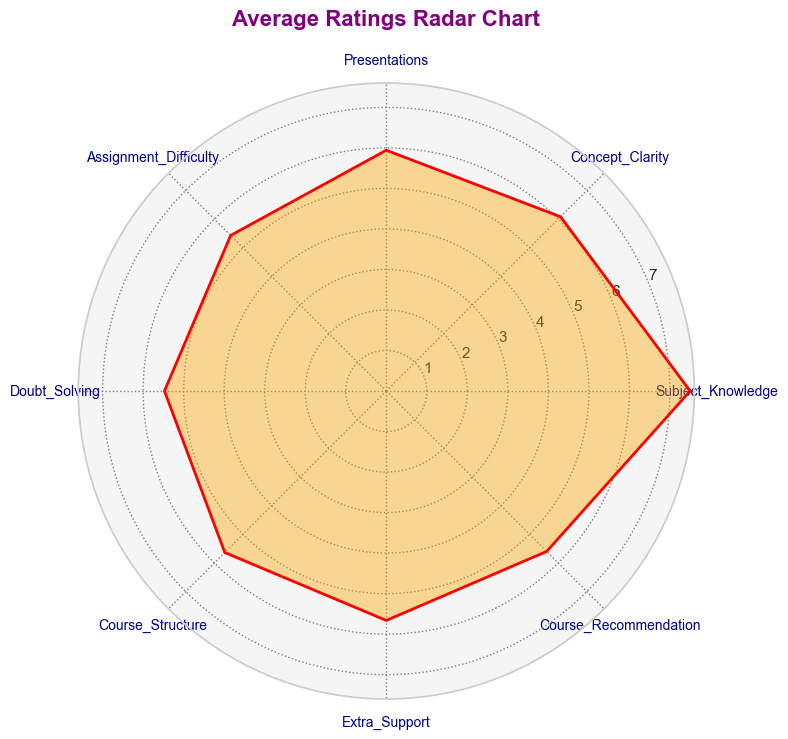

In [241]:

avg_scores = feedback[rating_cols].mean()
num_vars = len(rating_cols)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
avg_scores = avg_scores.tolist()
avg_scores += avg_scores[:1]  
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)


plt.xticks(angles[:-1], rating_cols, color='darkblue', fontsize=10)

ax.plot(angles, avg_scores, color="red", linewidth=2, linestyle='solid')
ax.fill(angles, avg_scores, color="orange", alpha=0.4)


ax.set_facecolor("#f5f5f5")
ax.grid(color="gray", linestyle="dotted")
plt.title("Average Ratings Radar Chart", fontsize=16, fontweight="bold", color="purple", pad=20)

plt.show()


## Charts & Visualizations on Student Satisfaction Dataset

## Attractive Chart – Ratings Distribution

C:\Users\Vikas\AppData\Local\Temp\ipykernel_6688\1987102382.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Weightage", title_fontsize=13, fontsize=11, frameon=True, edgecolor="black")


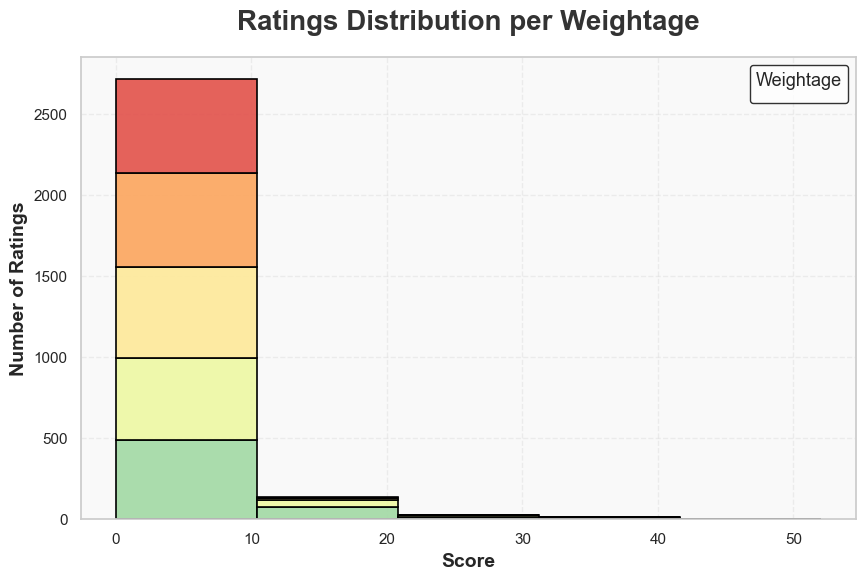

In [242]:

sns.set_style("whitegrid")
sns.set_palette("Spectral")  # colorful palette

rating_cols = ["W1", "W2", "W3", "W4", "W5"]
ratings_melted = Statisfaction.melt(value_vars=rating_cols, var_name="Weightage", value_name="Score")

plt.figure(figsize=(10,6))
ax = sns.histplot(data=ratings_melted, 
                  x="Score", 
                  hue="Weightage", 
                  multiple="stack", 
                  bins=5,
                  edgecolor="black", 
                  linewidth=1.2,
                  alpha=0.9)

# Titles and labels
plt.title("Ratings Distribution per Weightage", fontsize=20, fontweight="bold", color="#333333", pad=20)
plt.xlabel("Score", fontsize=14, fontweight="bold")
plt.ylabel("Number of Ratings", fontsize=14, fontweight="bold")

# Style legend
plt.legend(title="Weightage", title_fontsize=13, fontsize=11, frameon=True, edgecolor="black")

# Grid and background
ax.set_facecolor("#f9f9f9")
plt.grid(alpha=0.3, linestyle="--")

plt.show()


## Average % by Course chart

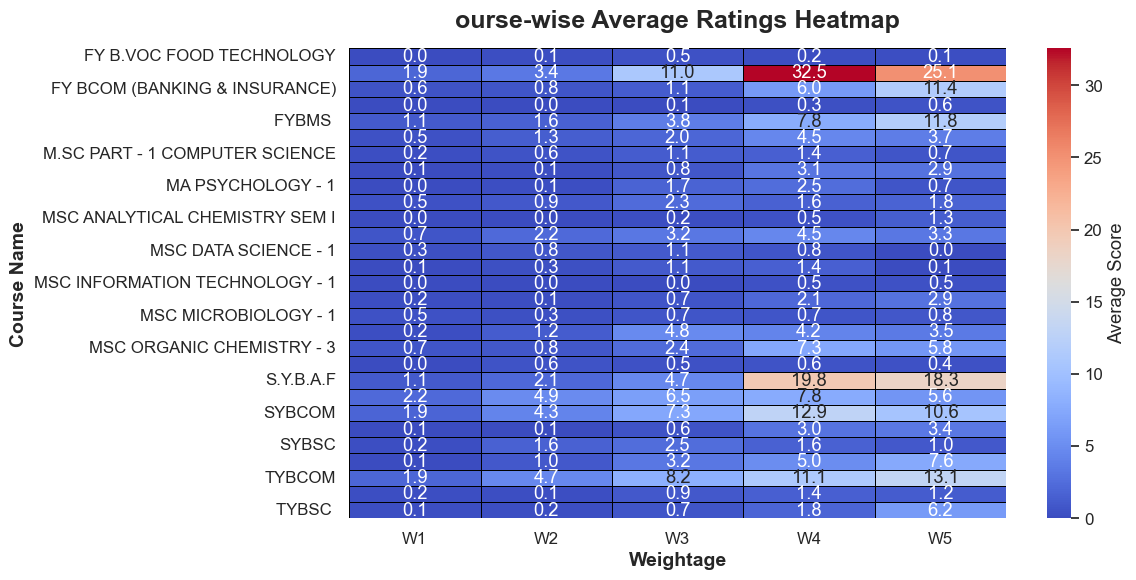

In [244]:

rating_cols = ["W1", "W2", "W3", "W4", "W5"]
Statisfaction[rating_cols] = Statisfaction[rating_cols].apply(pd.to_numeric, errors="coerce")

heatmap_data = Statisfaction.groupby("Course Name ")[rating_cols].mean()


plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)
ax = sns.heatmap(
    heatmap_data,
    annot=True, fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Average Score'},
    linewidths=0.5,
    linecolor="black"
)

plt.title("ourse-wise Average Ratings Heatmap", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Weightage", fontsize=14, fontweight="bold")
plt.ylabel("Course Name", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Student Satisfaction Insights – Word Cloud

C:\Users\Vikas\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128173 (\N{THOUGHT BALLOON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


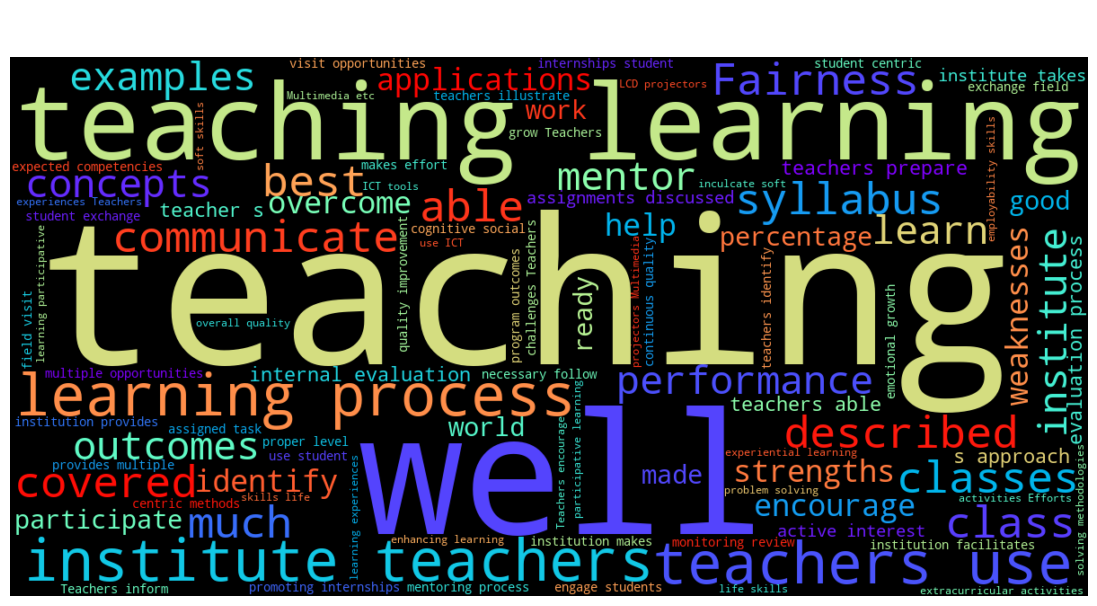

In [ ]:

text_columns = ["Feedback", "Configured", "Ques"]

# Flatten all text into a single list
all_text_list = []
for col in text_columns:
    all_text_list.extend(Statisfaction[col].dropna().astype(str).tolist())

# Join into one big string
text_data = " ".join(all_text_list)

# Extra stopwords
stopwords = set(STOPWORDS)
stopwords.update(["nan", "None", "Course", "Feedback"])

# Create word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="black",
    colormap="rainbow",
    contour_color="white",
    contour_width=2,
    stopwords=stopwords,
    max_words=300
).generate(text_data)

# Plot
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("💭 Word Cloud from Student Feedback", fontsize=20, fontweight="bold", pad=20, color="white")
plt.show()


C:\Users\Vikas\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


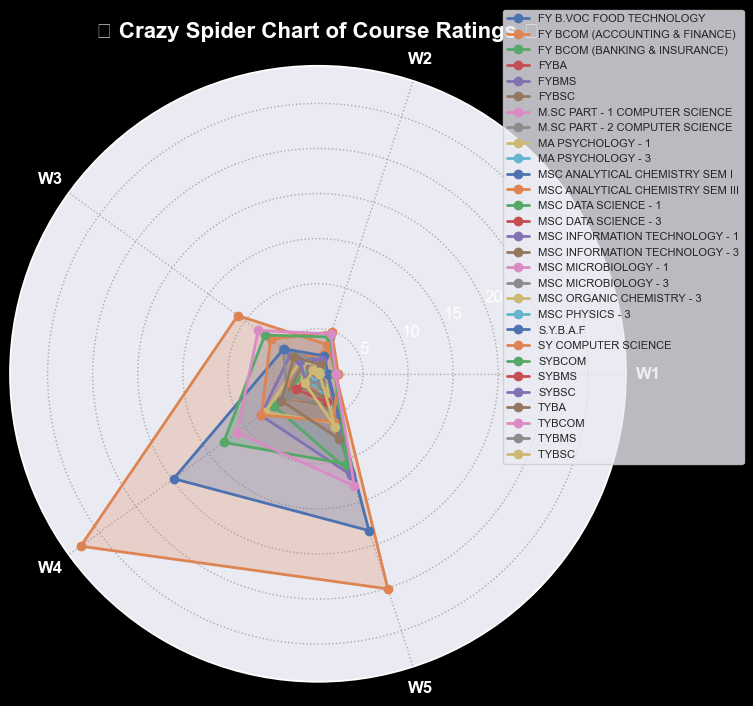

In [ ]:

# Columns for ratings
rating_cols = ["W1", "W2", "W3", "W4", "W5"]

# Get average ratings per course
course_ratings = Statisfaction.groupby("Course Name ")[rating_cols].mean()

# Number of variables
num_vars = len(rating_cols)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot
plt.figure(figsize=(8,8), facecolor="black")

for course, row in course_ratings.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    plt.polar(angles, values, marker='o', linewidth=2, label=course)
    plt.fill(angles, values, alpha=0.25)

# Labels & style
plt.xticks(angles[:-1], rating_cols, color="white", fontsize=12, fontweight="bold")
plt.yticks(color="white")
plt.title("Crazy Spider Chart of Course Ratings ", color="white", fontsize=16, fontweight="bold", pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), fontsize=8)
plt.grid(True, color="gray", linestyle="dotted", alpha=0.6)

plt.show()
